# Pinguinos

<img src="pinguino.png">

In [ ]:
# <img src="pinguino.png">

## 1. Cargar datos
Importamos las librerias

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Podemos elegir entre una base de datos la que queramos

In [27]:
sns.get_dataset_names();

In [28]:
pinguinos = sns.load_dataset("penguins")

In [29]:
pinguinos.columns = ["especie", "isla", "longitud_pico", 
                     "profundidad_pico", "longitud_aleta", "masa", "sexo"]
pinguinos.head(2)

,especie,isla,longitud_pico,profundidad_pico,longitud_aleta,masa,sexo
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female


In [31]:
pinguinos.describe()

,longitud_pico,profundidad_pico,longitud_aleta,masa
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [33]:
pinguinos.cov()

,longitud_pico,profundidad_pico,longitud_aleta,masa
longitud_pico,29.807054,-2.534234,50.375765,2605.591912
profundidad_pico,-2.534234,3.899808,-16.212950,-747.370093
longitud_aleta,50.375765,-16.212950,197.731792,9824.416062
masa,2605.591912,-747.370093,9824.416062,643131.077327


## 2. Gráficos de dispersión

Hacemos una gráfica preliminar.
Agregamos Algunas opciones de visualización

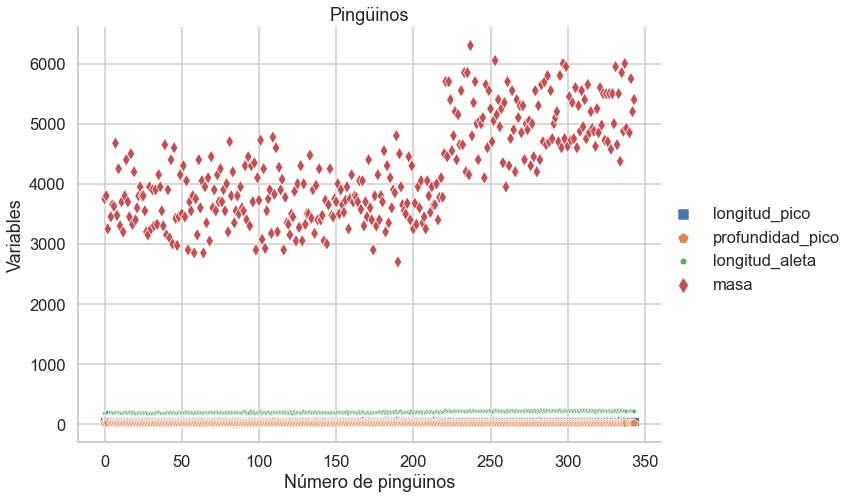

In [5]:
sns.set_theme(style="whitegrid", context="talk")
relacional = sns.relplot(data=pinguinos, height=7, aspect=1.4, markers=["s", "p", ".", "d"])
relacional.set(title="Pingüinos")
relacional.set_ylabels("Variables")
relacional.set_xlabels("Número de pingüinos")
plt.show()

Debemos saber que variables graficar, recordemos que hay variables numéricas y categóricas,
por ejemplo la siguiente gráfica, aunque correcta, no dice nada

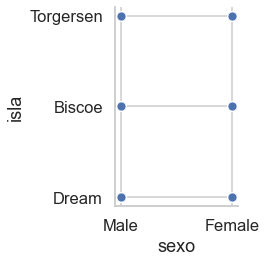

In [6]:
sns.relplot(data=pinguinos,
           x="sexo",
           y="isla", height=4)
plt.show()

Refinemos los datos para observar mejor, esta vez grafiquemos solo dos columnas de datos numéricos.

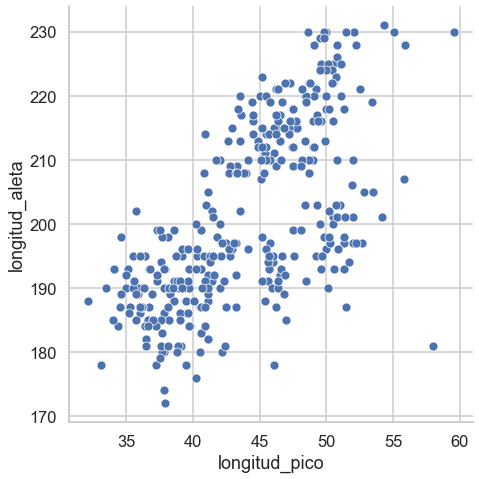

In [30]:
sns.relplot(data=pinguinos,
           x="longitud_pico",
           y="longitud_aleta", height=7)
plt.show()

Ahora adicionemos otros datos y veamos como interpretar la gráfica según el color.

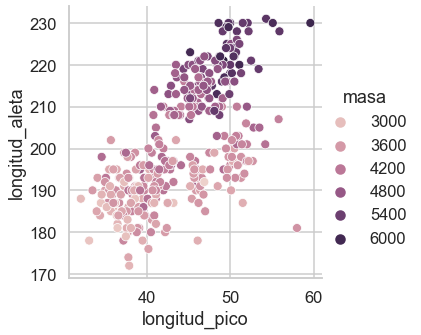

In [33]:
sns.relplot(data=pinguinos,
           x="longitud_pico",
           y="longitud_aleta",
           hue="masa")
plt.show()

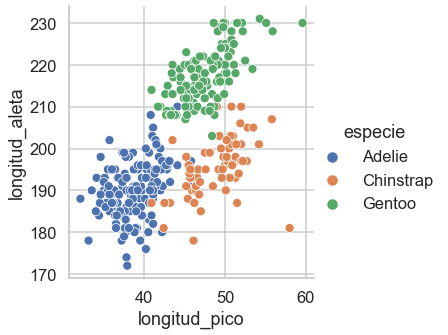

In [35]:
sns.relplot(data=pinguinos,
           x="longitud_pico",
           y="longitud_aleta",
           hue="especie")
plt.show()

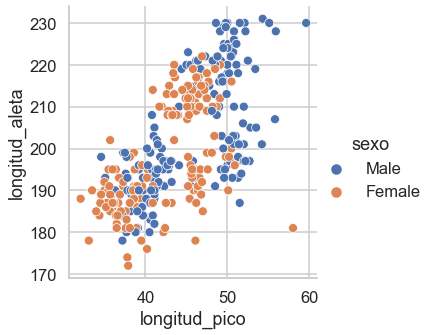

In [36]:
sns.relplot(data=pinguinos,
           x="longitud_pico",
           y="longitud_aleta",
           hue="sexo")
plt.show()

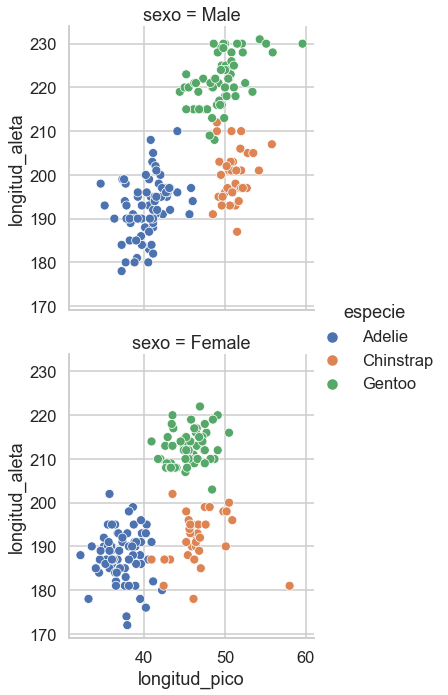

In [38]:
sns.relplot(data=pinguinos,
           x="longitud_pico",
           y="longitud_aleta",
           hue="especie",
            row="sexo")
plt.show()

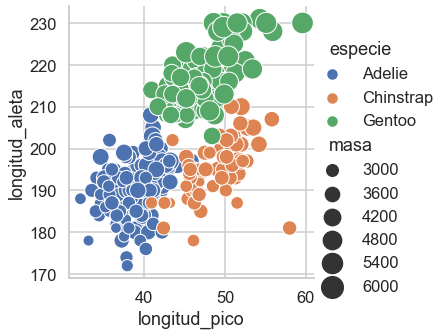

In [41]:
sns.relplot(data=pinguinos,
           x="longitud_pico",
           y="longitud_aleta",
           hue="especie",
           size="masa",
           sizes=(100,500))
plt.show()

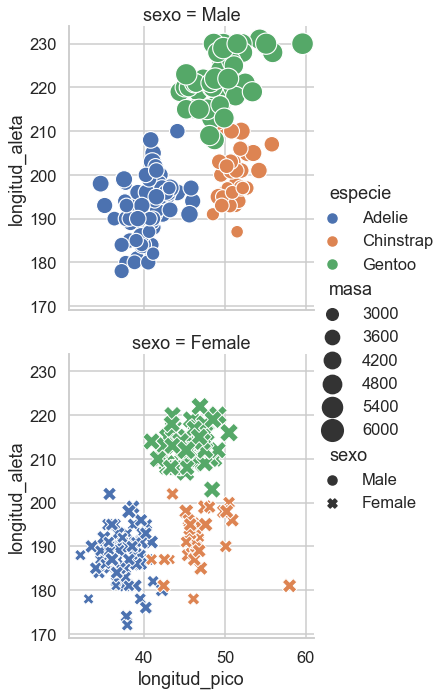

In [50]:
sns.relplot(data=pinguinos,
           x="longitud_pico",
           y="longitud_aleta",
           hue="especie",
            row="sexo",
            size="masa",
            sizes=(100, 500),
           style="sexo")
plt.show()

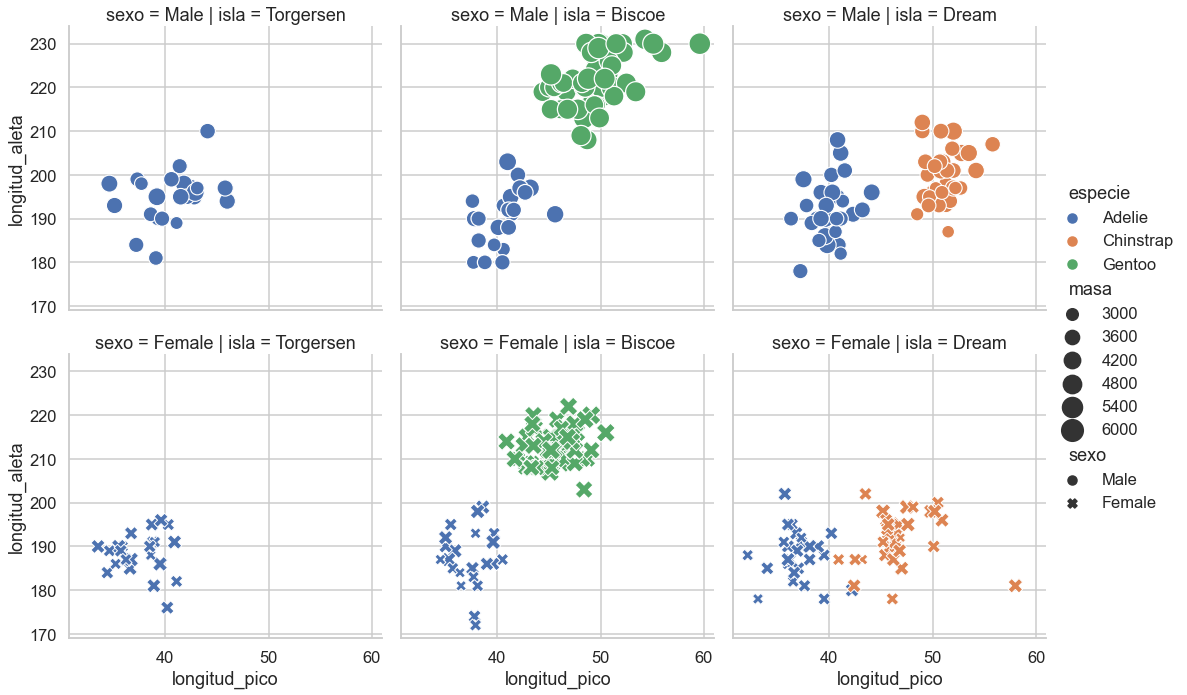

In [51]:
sns.relplot(data=pinguinos,
           x="longitud_pico",
           y="longitud_aleta",
           hue="especie",
            row="sexo",
            col="isla",
            size="masa",
            sizes=(100, 500),
           style="sexo")
plt.show()

## 3. Gráficos de violín

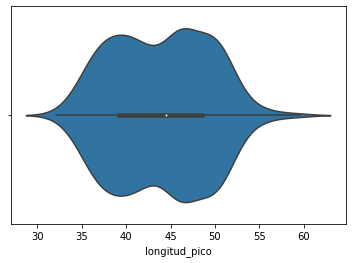

In [14]:
sns.violinplot(x=pinguinos["longitud_pico"])
plt.show()

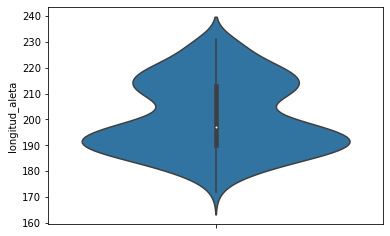

In [15]:
sns.violinplot(y=pinguinos["longitud_aleta"])
plt.show()

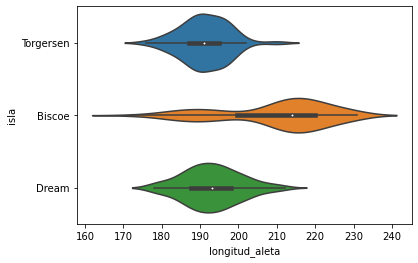

In [16]:
sns.violinplot(data=pinguinos, x="longitud_aleta", y="isla")
plt.show()

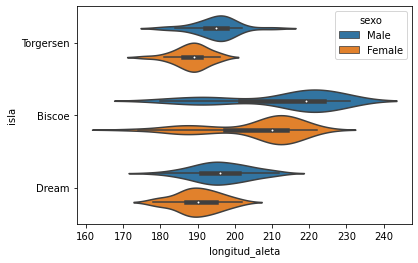

In [17]:
sns.violinplot(data=pinguinos, x="longitud_aleta", y="isla", hue="sexo")
plt.show()

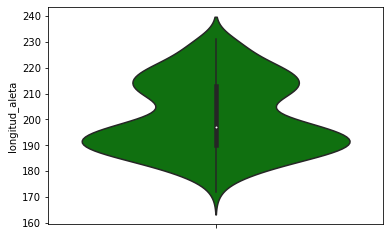

In [25]:
sns.violinplot(y=pinguinos["longitud_aleta"], color='green')
plt.show()

## 4. Gráficos de datos categóricos

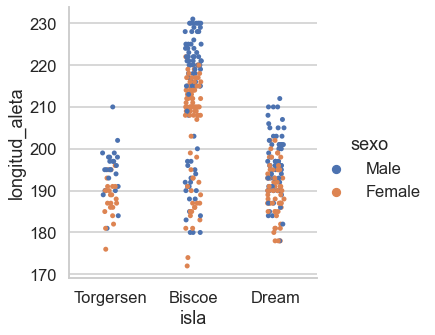

In [20]:
sns.catplot(data=pinguinos, x="isla", y="longitud_aleta", kind='strip', hue='sexo')
plt.show()

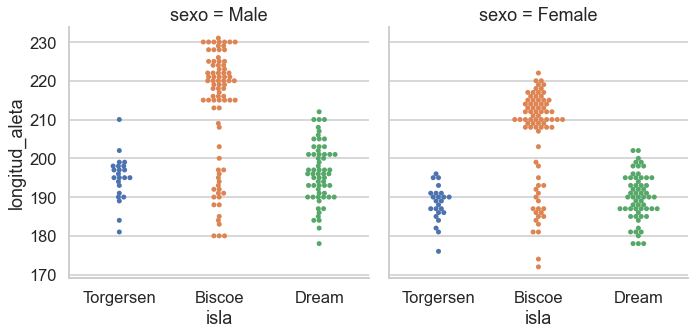

In [22]:
sns.catplot(data=pinguinos, x="isla", y="longitud_aleta", kind='swarm', col='sexo')
plt.show()

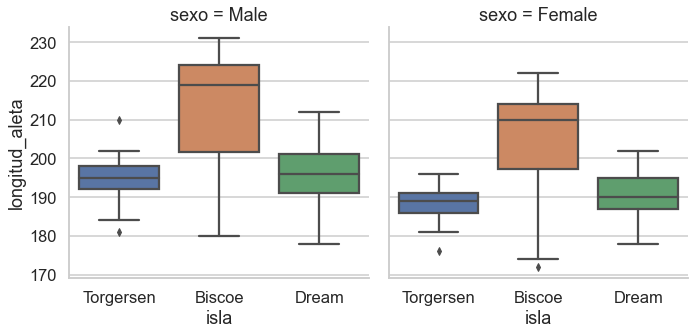

In [23]:
sns.catplot(data=pinguinos, x="isla", y="longitud_aleta", kind='box', col='sexo')
plt.show()

## 5. Gráficos de líneas

En este caso mostramos líneas. Tenga en cuenta el comando ci=intevalo de confianza. sd= desviación estandar. ci=95 quiere decir que el 95% de los datos caen en el área sombreada

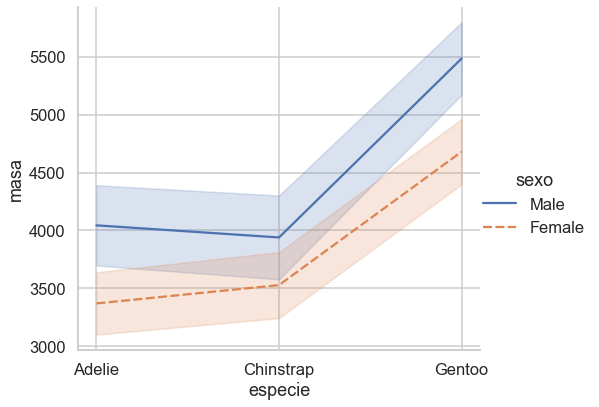

In [77]:
sns.relplot(data=pinguinos,
           x="especie",
           y="masa",
           hue="sexo",
           kind ="line",
           style="sexo",
           ci="sd", 
           height=6, 
           aspect=1.2)
plt.show()

Combinando gráficas. 
Esto no se puede hacer con relplot, debemos predefinir si la gráfica es de dispersión o de líneas.

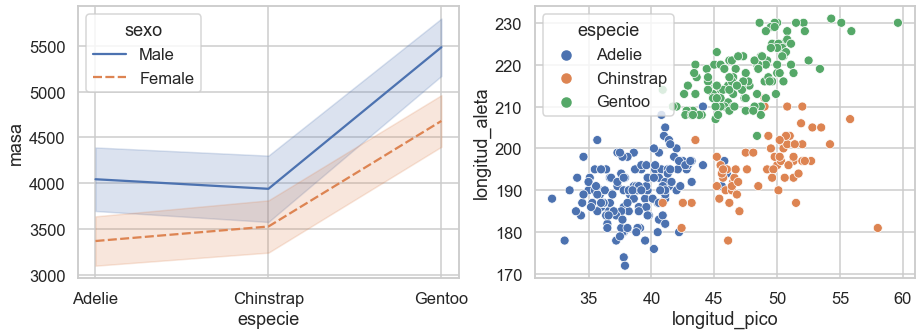

In [79]:
figura, ejes = plt.subplots(1,2, figsize=(15, 5))
sns.lineplot(data=pinguinos,
           x="especie",
           y="masa",
           hue="sexo",
           style="sexo",
           ci="sd",
           ax=ejes[0])

sns.scatterplot(data=pinguinos,
           x="longitud_pico",
           y="longitud_aleta",
           hue="especie",
           ax=ejes[1])

plt.show()

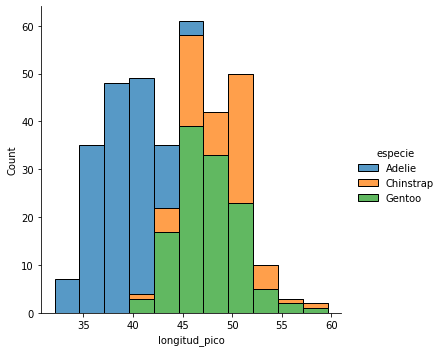

In [5]:
sns.displot(data=pinguinos, x="longitud_pico", hue="especie", multiple="stack")

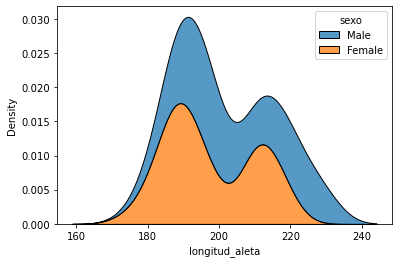

In [7]:
sns.kdeplot(data=pinguinos, x="longitud_aleta", hue="sexo", multiple="stack")
plt.show()

Puedes enconrar mas opciones de gráficas en:
https://seaborn.pydata.org/tutorial/function_overview.html
https://seaborn.pydata.org/generated/seaborn.lineplot.html
https://seaborn.pydata.org/examples/index.html


## 6. Más alla

C:\Users\User\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\User\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\User\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\User\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


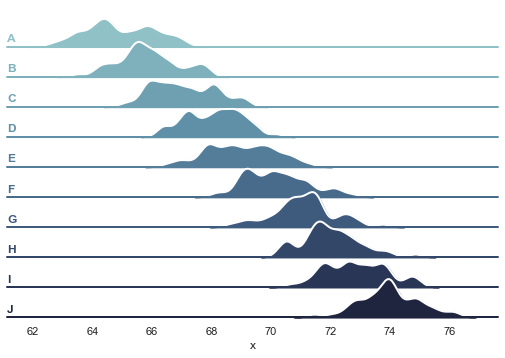

In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Create the data
rs = np.random.RandomState(1979)
x = rs.randn(500)
g = np.tile(list("ABCDEFGHIJ"), 50)
df = pd.DataFrame(dict(x=x, g=g))
m = df.g.map(ord)
df["x"] += m

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="g", hue="g", aspect=15, height=.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "x",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "x", clip_on=False, color="w", lw=2, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "x")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)
plt.show()